# Assignment 6
SUPPAKORN RAKNA (63070501061)

### Build the circuits in *Cirq* to generate all possible Bell state

In [1]:
import cirq
from cirq.ops import *
from cirq.circuits import InsertStrategy
import matplotlib.pyplot as plt

In [2]:
thick_label = [bin(x)[2:].zfill(2) for x in range(2 ** 2)]

#### Bell states or sometimes the EPR states or EPR pairs
Consider a circuit, which has a Hadamard gate followed by a CNOT gate, and transforms the four computational basis states
>- first, the Hadamard gate puts the top qubit in a superposition
>- then acts as a control input to the CNOT , and the target gets inverted only when the control is 1 

#### The general form of Bell State $|\beta_{xy}\rangle=\frac{|0,y\rangle+(-1)^x|1,\bar{y}\rangle}{\sqrt2}$
> The $x$ and $y$ are called phase bit and parity bit and $\bar{y}$ is the negation of $y$.

- $\frac{|00\rangle+|11\rangle}{\sqrt2}\equiv|\beta_{00}\rangle\equiv|\Phi^+\rangle$

In [3]:
q0 = cirq.NamedQubit('control')
q1 = cirq.NamedQubit('target')

In [4]:
phi_positive = cirq.Circuit([H(q0), CNOT(q0, q1)])
vector = cirq.Simulator().simulate(phi_positive)

In [5]:
phi_positive.append(cirq.measure(q0, q1, key='result'))
histogram = cirq.Simulator().run(phi_positive, repetitions=1000)

Sample the circuit:

control: ───H───@───M('result')───
                │   │
target: ────────X───M─────────────

measurements: (no measurements)
output vector: 0.707|00⟩ + 0.707|11⟩


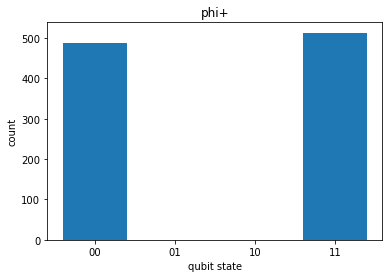

In [6]:
print('Sample the circuit:\n')
print(phi_positive)
print()
print(vector)
_ = cirq.vis.plot_state_histogram(histogram, plt.subplot(), title = 'phi+', xlabel = 'qubit state', ylabel = 'count', tick_label=thick_label)

- $\frac{|00\rangle-|11\rangle}{\sqrt2}\equiv|\beta_{10}\rangle\equiv|\Phi^-\rangle$

In [7]:
q0 = cirq.NamedQubit('control')
q1 = cirq.NamedQubit('target')

In [8]:
phi_negative = cirq.Circuit([X(q0), H(q0), CNOT(q0, q1)])
vector = cirq.Simulator().simulate(phi_negative)

In [9]:
phi_negative.append(cirq.measure(q0, q1, key='result'))
histogram = cirq.Simulator().run(phi_negative, repetitions=1000)

Sample the circuit:

control: ───X───H───@───M('result')───
                    │   │
target: ────────────X───M─────────────

measurements: (no measurements)
output vector: 0.707|00⟩ - 0.707|11⟩


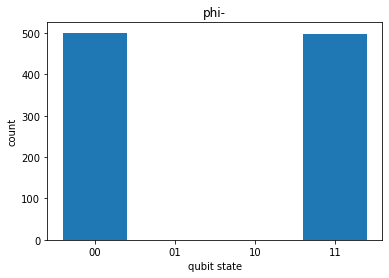

In [10]:
print('Sample the circuit:\n')
print(phi_negative)
print()
print(vector)
_ = cirq.vis.plot_state_histogram(histogram, plt.subplot(), title = 'phi-', xlabel = 'qubit state', ylabel = 'count', tick_label=thick_label)

- $\frac{|01\rangle+|10\rangle}{\sqrt2}\equiv|\beta_{01}\rangle\equiv|\Psi^+\rangle$

In [11]:
q0 = cirq.NamedQubit('control')
q1 = cirq.NamedQubit('target')

In [12]:
psi_positive = cirq.Circuit([X(q1)])
psi_positive.append([H(q0), CNOT(q0, q1)], strategy=InsertStrategy.NEW_THEN_INLINE)
vector = cirq.Simulator().simulate(psi_positive)

In [13]:
psi_positive.append(cirq.measure(q0, q1, key='result'))
histogram = cirq.Simulator().run(psi_positive, repetitions=1000)

Sample the circuit:

control: ───────H───@───M('result')───
                    │   │
target: ────X───────X───M─────────────

measurements: (no measurements)
output vector: 0.707|01⟩ + 0.707|10⟩


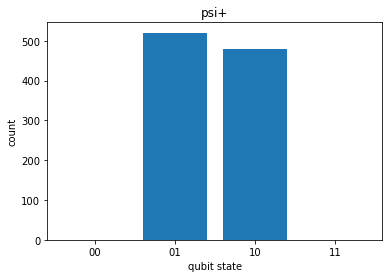

In [14]:
print('Sample the circuit:\n')
print(psi_positive)
print()
print(vector)
_ = cirq.vis.plot_state_histogram(histogram, plt.subplot(), title = 'psi+', xlabel = 'qubit state', ylabel = 'count', tick_label=thick_label)

- $\frac{|01\rangle-|10\rangle}{\sqrt2}\equiv|\beta_{11}\rangle\equiv|\Psi^-\rangle$

In [15]:
q0 = cirq.NamedQubit('control')
q1 = cirq.NamedQubit('target')

In [16]:
psi_negative = cirq.Circuit([X(q0), X(q1), H(q0), CNOT(q0,q1)])
vector = cirq.Simulator().simulate(psi_negative)

In [17]:
psi_negative.append(cirq.measure(q0, q1, key='result'))
histogram = cirq.Simulator().run(psi_negative, repetitions=1000)

Sample the circuit:

control: ───X───H───@───M('result')───
                    │   │
target: ────X───────X───M─────────────

measurements: (no measurements)
output vector: 0.707|01⟩ - 0.707|10⟩


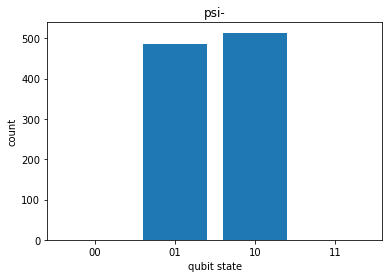

In [18]:
print('Sample the circuit:\n')
print(psi_negative)
print()
print(vector)
_ = cirq.vis.plot_state_histogram(histogram, plt.subplot(), title = 'psi-', xlabel = 'qubit state', ylabel = 'count', tick_label=thick_label)